In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import MulensModel as mm
%matplotlib inline

In [6]:
with h5py.File('/work/hmzhao/irregular-lc/random-even-batch-1.h5') as inp:
    X_random = inp['X_random'][...]
    X_even = inp['X_even'][...]
    Y = inp['Y'][...]

In [2]:
with h5py.File('/work/hmzhao/irregular-lc/KMT-fixrho-0.h5') as inp:
    X = inp['X'][...]
    Y = inp['Y'][...]

In [3]:
with h5py.File('/work/hmzhao/irregular-lc/KMT-loc-test.h5') as inp:
    X = inp['X'][...]
    Y = inp['Y'][...]

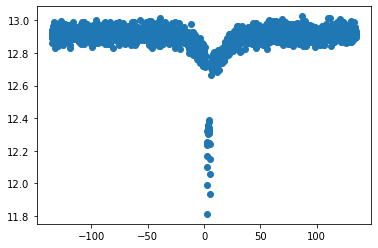

In [4]:
i = 0
plt.scatter(X[i, :, 0], X[i, :, 1])

In [5]:
# denoise
from scipy.signal import medfilt
from tqdm.notebook import tqdm
for i in tqdm(range(X.shape[0])):
    X[i, :, 1] = medfilt(X[i, :, 1], kernel_size=11)


  0%|          | 0/100000 [00:00<?, ?it/s]

In [6]:
with h5py.File('/work/hmzhao/irregular-lc/KMT-loc-denoised-test.h5', 'w') as inp:
    inp['X'] = X
    inp['Y'] = Y

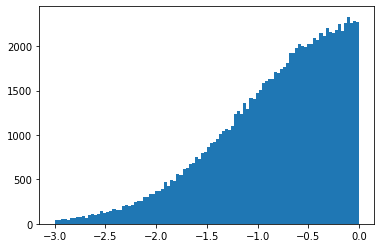

In [32]:
plt.hist(np.log10(Y[:, 4]), bins=100)
plt.show()

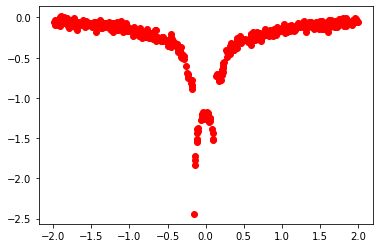

[0.00000000e+00 1.00000000e+00 7.98007034e-01 1.00000000e-03
 6.81834427e-02 1.52026709e+00 2.69336038e+02 9.54870318e-01]
22870.373070826372 -1.1663210745267656


In [ ]:
num = 14
plt.scatter(X[num][:, 0], X[num][:, 1]-14.5-2.5*np.log10(Y[num, -1]), color='red')
plt.show()
print(Y[num])
single = mm.Model({'t_0': Y[num, 0], 'u_0': Y[num, 2], 't_E': Y[num, 1]})
data = mm.MulensData([X[num, :, 0], X[num, :, 1], X[num, :, 2]], phot_fmt='flux')
event_single = mm.Event([data], single)
chi2 = event_single.get_chi2()
print(chi2, np.log10(Y[num, 4]))

In [11]:
from tqdm.notebook import tqdm
chi2s = []
for num in tqdm(range(len(Y))):
    single = mm.Model({'t_0': Y[num, 0], 'u_0': Y[num, 2], 't_E': Y[num, 1]})
    data = mm.MulensData([X[num, :, 0], X[num, :, 1], X[num, :, 2]], phot_fmt='flux')
    event_single = mm.Event([data], single)
    chi2 = event_single.get_chi2()
    chi2s.append(chi2)
chi2s = np.array(chi2s)

  0%|          | 0/100000 [00:00<?, ?it/s]

In [6]:
Y[:, -1].argmin()

83559

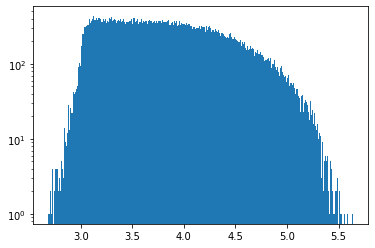

In [25]:
hist = plt.hist(np.log10(chi2s), bins=500, log=True)
plt.show()

In [4]:
X_even = np.delete(X_even, 2718, 0)
X_random = np.delete(X_random, 2718, 0)
Y = np.delete(Y, 2718, 0)

NameError: name 'X_even' is not defined

In [6]:
Y[0]

array([0.00000000e+00, 5.00000000e+01, 5.00052731e-01, 8.50489295e-03,
       6.85174921e-02, 2.97909059e+00, 2.15215555e+02])

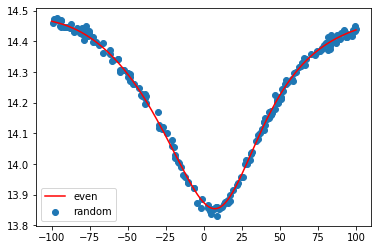

[0.00000000e+00 5.00000000e+01 5.00052731e-01 8.50489295e-03
 6.85174921e-02 2.97909059e+00 2.15215555e+02]
0.703359852895534 -1.1641985413060159


In [4]:
num = 0
plt.plot(X_even[num][:, 0], X_even[num][:, 1], color='red')
plt.scatter(X_random[num][:, 0], X_random[num][:, 1])
plt.legend(['even', 'random'])
plt.show()
print(Y[num])
# plt.plot(X[num][:, 0], X[num][:, 1])
# plt.errorbar(X[num][:, 0], X[num][:, 1], yerr = X[num][:, 2])

single = mm.Model({'t_0': Y[num, 0], 'u_0': Y[num, 2], 't_E': Y[num, 1]})
data = mm.MulensData([X_random[num, :, 0], X_random[num, :, 1], X_random[num, :, 2]], phot_fmt='flux')
event_single = mm.Event([data], single)
chi2 = event_single.get_chi2()
print(chi2/7200, np.log10(Y[num, 4]))

In [11]:
import MulensModel as mm

parameters = {
        't_0': Y[num, 0].item(),
        't_E': Y[num, 1].item(),
        'u_0': Y[num, 2].item(),
        'rho': Y[num, 3].item(), 
        'q': Y[num, 4].item(), 
        's': Y[num, 5].item(), 
        'alpha': Y[num, 6].item(),
    }
# fs = Y[num, 7].item()
fs = 1
print(fs)
modelmm = mm.Model(parameters, coords=None)
times = modelmm.set_times(t_start=parameters['t_0']-2*parameters['t_E'], t_stop=parameters['t_0']+2*parameters['t_E'], n_epochs=1000)
modelmm.set_magnification_methods([parameters['t_0']-2*parameters['t_E'], 'VBBL', parameters['t_0']+2*parameters['t_E']])
magnification = modelmm.get_magnification(times)
flux = 1000 * (magnification + (1 - (fs)) / (fs))
mag = (22 - 2.5 * np.log10(flux))
lc = np.stack([times, mag], axis=-1)

1


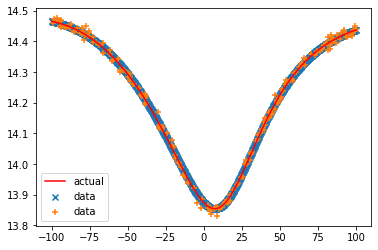

[0.00000000e+00 5.00000000e+01 5.00052731e-01 8.50489295e-03
 6.85174921e-02 2.97909059e+00 2.15215555e+02]


In [17]:
plt.scatter(X_even[num, :, 0], X_even[num, :, 1], label='data', marker='x')
plt.scatter(X_random[num, :, 0], X_random[num, :, 1], label='data', marker='+')
plt.plot(lc[:, 0], lc[:, 1], label='actual', color='red')
plt.legend()
plt.show()
print(Y[num])

In [22]:
from tqdm.notebook import tqdm
chi2s = []
for num in tqdm(range(len(Y))):
    single = mm.Model({'t_0': Y[num, 0], 'u_0': Y[num, 2], 't_E': Y[num, 1]})
    data = mm.MulensData([X_random[num, :, 0], X_random[num, :, 1], X_random[num, :, 2]], phot_fmt='flux')
    event_single = mm.Event([data], single)
    chi2 = event_single.get_chi2()
    chi2s.append(chi2)

  0%|          | 0/9999 [00:00<?, ?it/s]

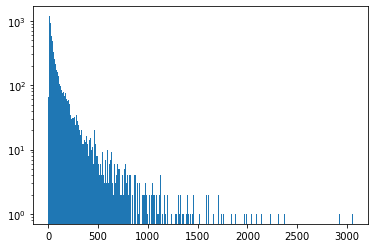

In [32]:
hist = plt.hist(np.array(chi2s)/7200, bins=500, log=True)
plt.show()

In [52]:
chi2s_scaled = (np.array(chi2s)/7200)
chi2s_scaled.max(), chi2s_scaled.argmin()

(3056.916196418834, 2054)

In [39]:
hist[0][:10]

array([  65.,  990., 1178.,  914.,  717.,  580.,  492.,  422.,  332.,
        294.])

In [40]:
hist[1][:5]

array([ 1.30075063,  7.41198152, 13.52321241, 19.63444331, 25.7456742 ])

In [51]:
chi2s_sort = np.sort(chi2s_scaled)
print(chi2s_sort[:100])

[1.30075063 1.43797483 1.5685558  1.96647588 2.47913432 2.52144555
 3.24430018 3.38131445 3.43618686 3.45186053 3.6203067  3.6211056
 3.6398955  3.67854056 3.82889494 3.83858377 4.353312   4.38628397
 4.44958282 4.54331037 4.66247163 4.83646095 4.86993697 4.96529406
 5.01153827 5.03911565 5.04502502 5.08701079 5.31998401 5.46673193
 5.54382798 5.56990679 5.64844582 5.66956945 5.87024897 5.90559772
 5.9539498  5.96323877 6.16250273 6.17174793 6.21284423 6.22352101
 6.26331743 6.30299773 6.3420083  6.42495362 6.45469226 6.52600688
 6.60567542 6.7629226  6.91200571 6.97703041 7.01212502 7.0263292
 7.07285354 7.19809834 7.2044508  7.22083416 7.22916792 7.23268852
 7.2396349  7.33856802 7.36724337 7.39392657 7.40692258 7.42976724
 7.44977507 7.46093797 7.50715069 7.52063147 7.53187476 7.53429146
 7.56197368 7.59337866 7.60348413 7.60376767 7.60589896 7.64158255
 7.65225484 7.70333485 7.70492851 7.71194546 7.74348288 7.7465615
 7.78022589 7.80614751 7.88788684 7.92424445 7.92480227 7.9264246

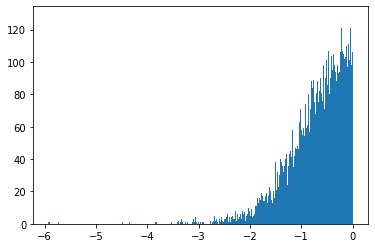

In [58]:
hist = plt.hist(np.log10(Y[:, 4]), bins=500,)
plt.show()

In [59]:
np.log10(Y[:, 4]).argmin()

9965

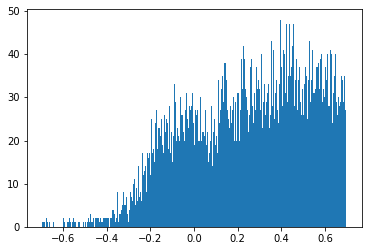

In [61]:
hist = plt.hist(np.log10(Y[:, 5]), bins=500,)
plt.show()